In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
dates = pd.date_range(start='1/1/2010', end='12/31/2020')
temperature = 20 + 10 * np.sin(np.linspace(0, 20*np.pi, len(dates))) + np.random.normal(0, 2, len(dates))
df = pd.DataFrame({'Date': dates, 'Temperature': temperature})
df.set_index('Date', inplace=True)

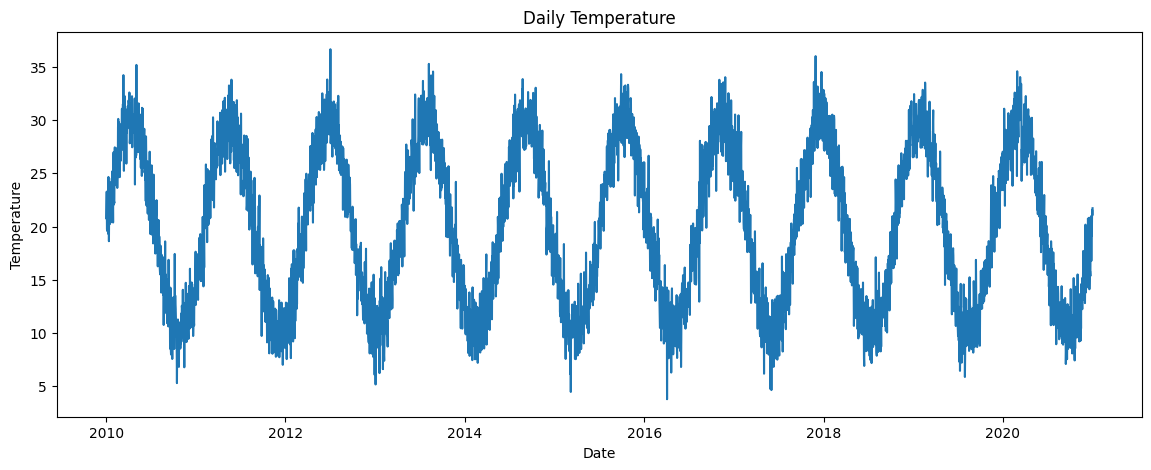

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df['Temperature'])
plt.title('Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [5]:
data = df['Temperature'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0311
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0045
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0044
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0047
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0042
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0045
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0043
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0043
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0042
Epoch 13/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0040
Epoch 14/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0042
Epoch 15/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0046
Epoc

In [10]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


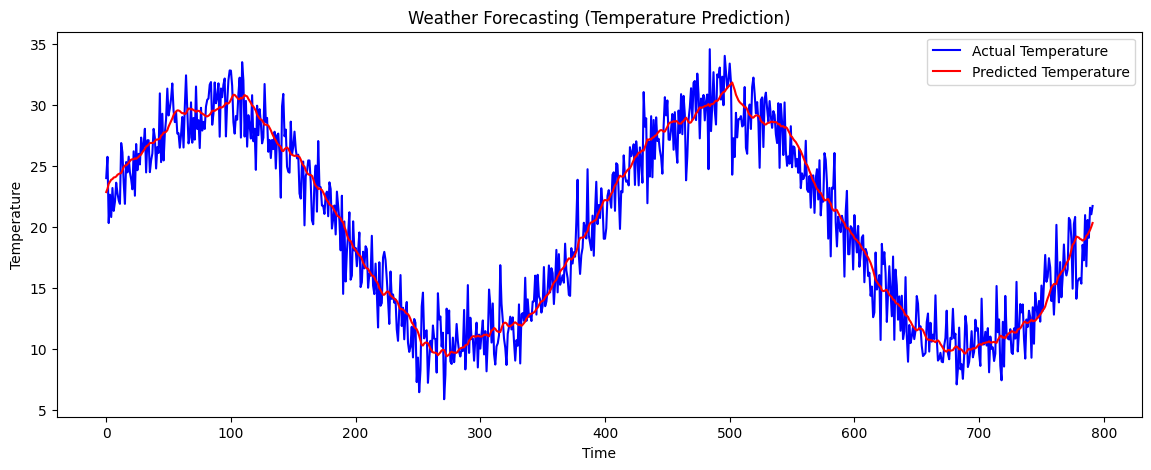

In [11]:
plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, color='blue', label='Actual Temperature')
plt.plot(predictions, color='red', label='Predicted Temperature')
plt.title('Weather Forecasting (Temperature Prediction)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()